In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from pathlib import Path
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

In [2]:
df = pd.read_csv("../data/04_features/train2_csv")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,count_zero
0,0.693147,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.630399,-0.598501,-0.023942,-1.852248,-1.286630,1.154128,-0.946811,-1.052173,-0.468946,70
1,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,-0.192488,-1.633473,0.528881,-0.064859,0.436435,-0.054719,0.546705,0.463496,-0.546782,83
2,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.058656,-1.070257,0.128361,-0.756956,-0.055650,-0.401451,0.781365,-0.393707,-0.307695,85
3,0.693147,0.0,0.0,0.693147,1.94591,0.693147,1.791759,0.000000,0.0,0.693147,...,1.633121,-0.165397,-0.401116,0.514496,-0.239119,0.296414,1.347759,-0.984027,-0.002113,55
4,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,-0.290137,-1.286090,0.905827,-0.662150,0.617909,0.075851,1.067699,0.320000,0.076571,82


In [3]:
train = pd.read_csv("../data/01_raw/train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
target = train["target"]
target.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [5]:
dict_a = {"Class_1": 0,
          "Class_2": 1,
          "Class_3": 2,
          "Class_4": 3,
          "Class_5": 4,
          "Class_6": 5,
          "Class_7": 6,
          "Class_8": 7,
          "Class_9": 8,
         }
target = target.map(dict_a)

In [6]:
df.shape

(206246, 104)

In [7]:
train = df[:len(target)]
train.shape

(61878, 104)

In [8]:
test = df[len(target):]
test.shape

(144368, 104)

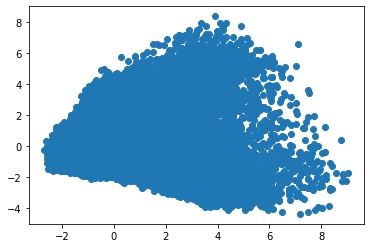

In [9]:
plt.scatter(train["pca0"], train["pca1"])

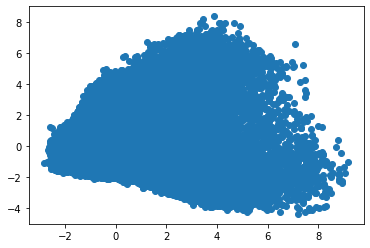

In [10]:
plt.scatter(test["pca0"], test["pca1"])

(array([11783., 22934., 11707.,  6216.,  3919.,  3606.,  1284.,   289.,
          113.,    27.]),
 array([-2.67181725, -1.50091875, -0.33002026,  0.84087824,  2.01177673,
         3.18267522,  4.35357372,  5.52447221,  6.69537071,  7.8662692 ,
         9.0371677 ]),
 <a list of 10 Patch objects>)

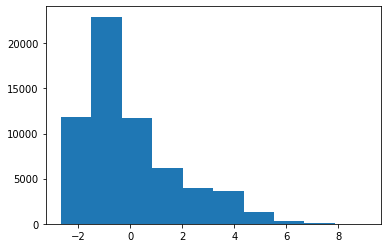

In [11]:
plt.hist(train["pca0"])

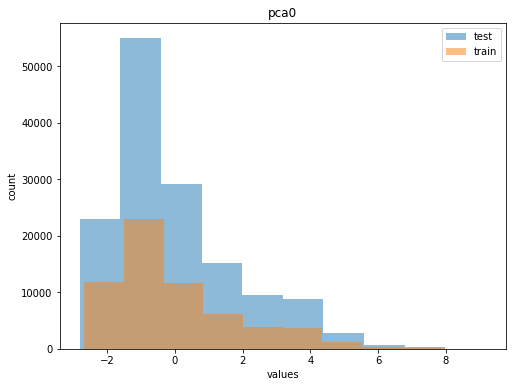

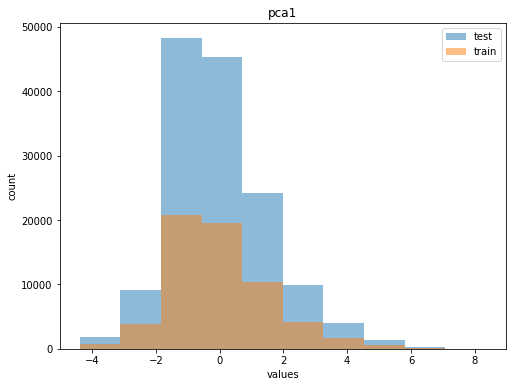

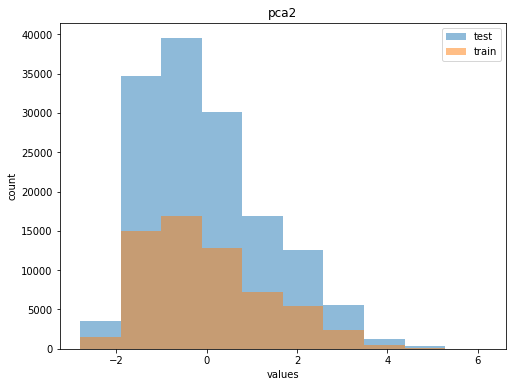

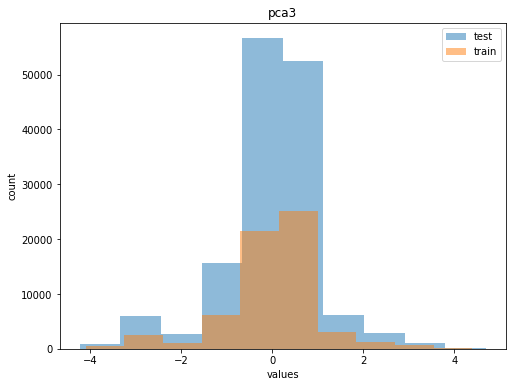

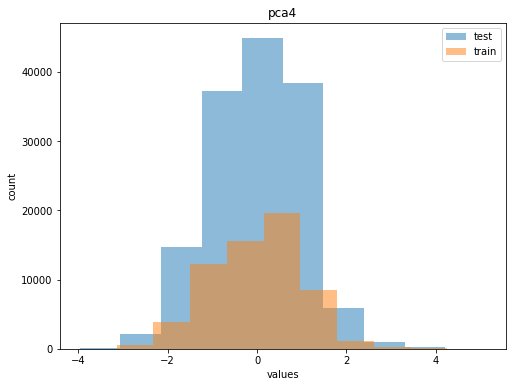

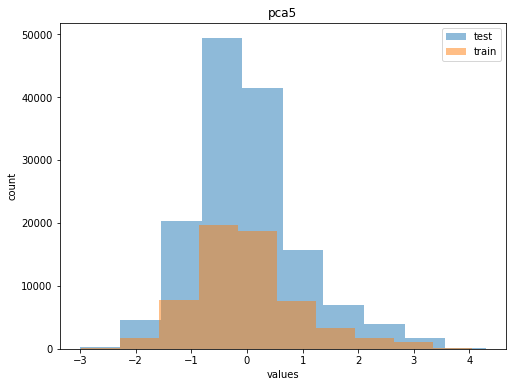

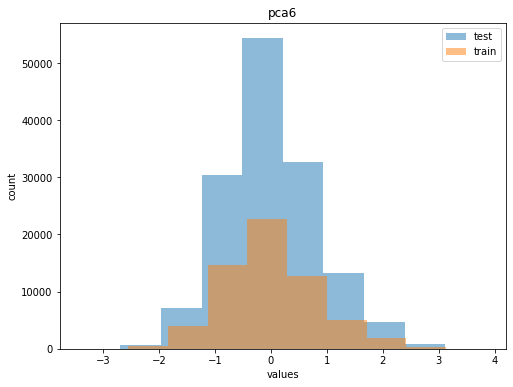

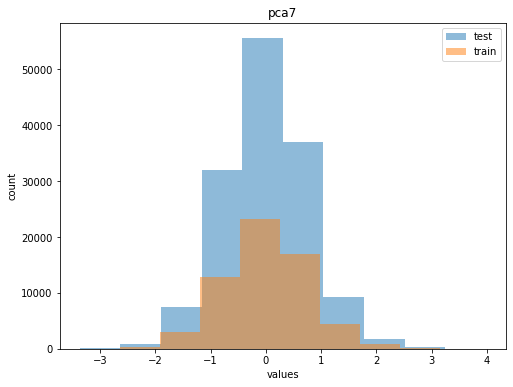

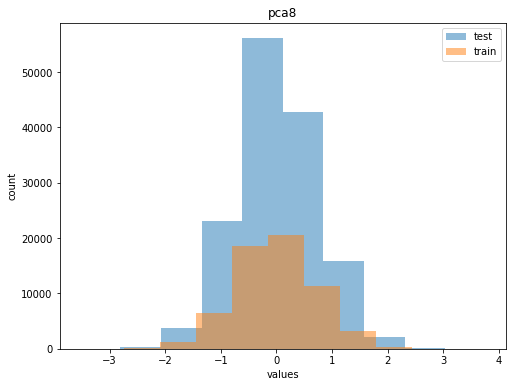

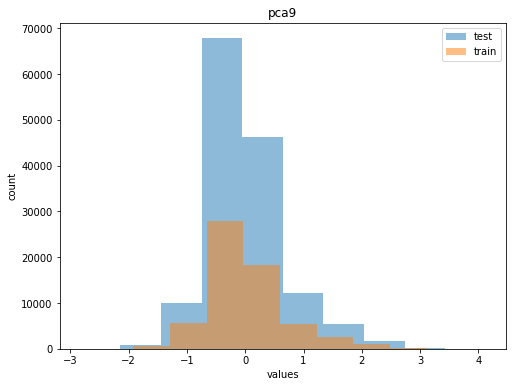

In [12]:
for i in range(10):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.hist(test[f"pca{i}"], alpha=0.5, label="test")
    ax.hist(train[f"pca{i}"],alpha=0.5, label="train")
    ax.legend()
    ax.set_title(f"pca{i}")
    ax.set_xlabel("values")
    ax.set_ylabel("count")

In [13]:
import lightgbm as lgb
clf2 = lgb.Booster(model_file="../data/06_models/lgb_2020-03-01 09:29:48.706771.txt")

In [14]:
test.shape

(144368, 104)

In [15]:
pred_test = clf2.predict(test)
pred_train = clf2.predict(train)

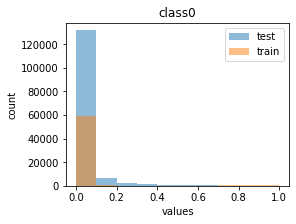

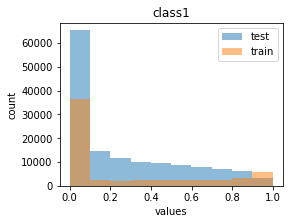

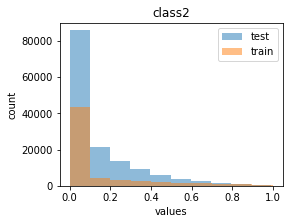

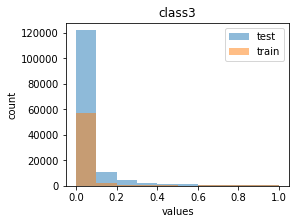

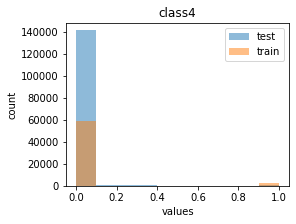

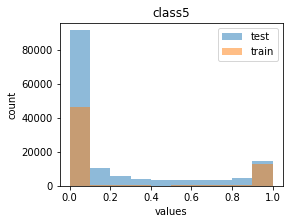

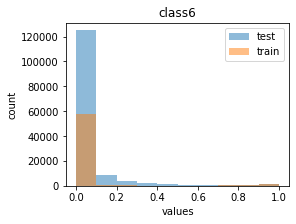

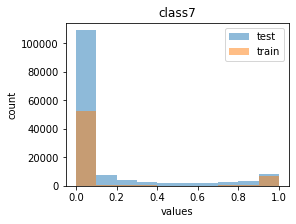

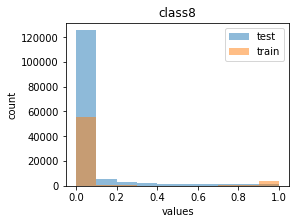

In [16]:
for i in range(9):
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(111)
    ax.hist(pred_test[:, i], alpha=0.5, label="test")
    ax.hist(pred_train[:, i],alpha=0.5, label="train")
    ax.legend()
    ax.set_title(f"class{i}")
    ax.set_xlabel("values")
    ax.set_ylabel("count")